In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [19]:
dataset_path = "dataset/electric_vehicles_spec_2025.csv"
dataset_df = pd.read_csv(dataset_path)
dataset_df

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [3]:
print(f"Total number of columns: {len(dataset_df.columns)}")
print("==================================================")

for col in dataset_df.columns:
    print(col)

Total number of columns: 22
brand
model
top_speed_kmh
battery_capacity_kWh
battery_type
number_of_cells
torque_nm
efficiency_wh_per_km
range_km
acceleration_0_100_s
fast_charging_power_kw_dc
fast_charge_port
towing_capacity_kg
cargo_volume_l
seats
drivetrain
segment
length_mm
width_mm
height_mm
car_body_type
source_url


In [4]:
subset_df = dataset_df[["model", "top_speed_kmh", "acceleration_0_100_s", "seats", "height_mm"]]
subset_df = subset_df.dropna()
subset_df['model'] = subset_df['model'].astype('str')
subset_df = subset_df.sort_values(by=["top_speed_kmh", "acceleration_0_100_s"], ascending=[False, True])

desc_df = subset_df.describe()
subset_df

,model,top_speed_kmh,acceleration_0_100_s,seats,height_mm
211,GranTurismo Folgore,325,2.7,4,1353
348,Taycan Turbo GT Weissach,305,2.2,2,1378
347,Taycan Turbo GT,290,2.3,5,1378
210,GranCabrio Folgore,290,2.8,4,1365
402,Model S Plaid,282,2.3,5,1431
...,...,...,...,...,...
298,Zafira-e Life L3 75 kWh,130,14.2,9,1890
315,e-Traveller L2 75 kWh,130,14.2,9,1890
317,e-Traveller L3 75 kWh,130,14.2,9,1890
99,Spring Electric 65,125,13.7,4,1516


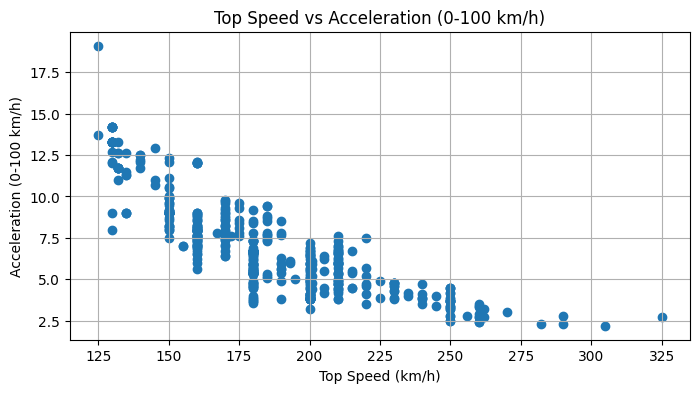

In [20]:
plt.figure(figsize=(8, 4))

plt.scatter(subset_df['top_speed_kmh'], 
            subset_df['acceleration_0_100_s'])

plt.title("Top Speed vs Acceleration (0-100 km/h)")
plt.xlabel("Top Speed (km/h)")
plt.ylabel("Acceleration (0-100 km/h)")
plt.grid(True)

plt.savefig("results/Top Speed vs Acceleration.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
mean_speed_each_seater_df = subset_df.iloc[:, 1:].groupby('seats', as_index=False).mean()
mean_speed_each_seater_df

,seats,top_speed_kmh,acceleration_0_100_s,height_mm
0,2,233.333333,3.466667,1345.333333
1,4,180.740741,7.966667,1506.925926
2,5,189.484293,6.369634,1571.787958
3,6,173.000000,6.600000,1855.800000
4,7,176.184211,8.323684,1776.315789
5,8,148.571429,10.014286,1929.428571
6,9,130.000000,13.580000,1890.000000


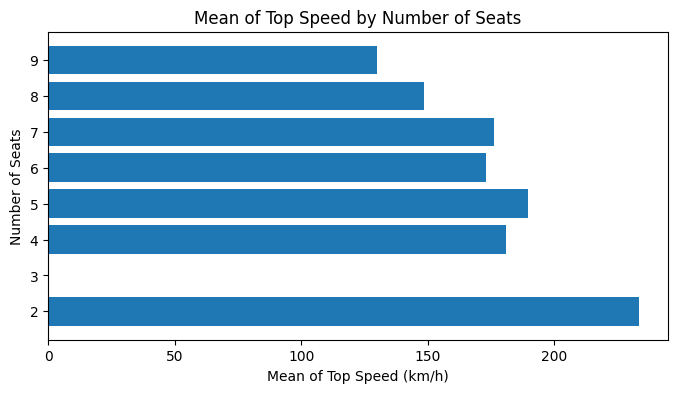

In [21]:
plt.figure(figsize=(8, 4))

plt.barh(mean_speed_each_seater_df['seats'], mean_speed_each_seater_df['top_speed_kmh'])

plt.title("Mean of Top Speed by Number of Seats")
plt.xlabel("Mean of Top Speed (km/h)")
plt.ylabel("Number of Seats")

plt.savefig("results/Mean of Top Speed by Number of Seats.png", dpi=300, bbox_inches='tight')
plt.show()


In [8]:
car_type_df = dataset_df[['length_mm', 'width_mm',	'height_mm', 'car_body_type']]
car_type_df

,length_mm,width_mm,height_mm,car_body_type
0,3673,1683,1518,Hatchback
1,3673,1683,1518,Hatchback
2,4187,1779,1557,SUV
3,4187,1779,1557,SUV
4,4680,1865,1700,SUV
...,...,...,...,...
473,4787,1930,1650,SUV
474,4432,1836,1566,SUV
475,4432,1836,1566,SUV
476,4432,1836,1566,SUV


In [9]:
car_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   length_mm      478 non-null    int64 
 1   width_mm       478 non-null    int64 
 2   height_mm      478 non-null    int64 
 3   car_body_type  478 non-null    object
dtypes: int64(3), object(1)
memory usage: 15.1+ KB


In [10]:
dimension_each_type_df = car_type_df.groupby('car_body_type', as_index=False).agg(
    length_mm=('length_mm', 'mean'),
    width_mm=('width_mm', 'mean'),
    height_mm=('height_mm', 'mean'),
    amount=('height_mm', 'count')
)
dimension_each_type_df = dimension_each_type_df.sort_values(by="amount", ascending=False).round(2)
dimension_each_type_df

,car_body_type,length_mm,width_mm,height_mm,amount
4,SUV,4639.93,1888.50,1636.00,244
5,Sedan,4951.56,1915.76,1462.59,63
2,Hatchback,4084.70,1783.25,1522.32,57
6,Small Passenger Van,4985.15,1928.06,1877.04,47
3,Liftback Sedan,4876.48,1919.58,1504.48,33
7,Station/Estate,4906.30,1921.33,1458.37,27
0,Cabriolet,4259.60,1829.80,1416.20,5
1,Coupe,5206.00,2018.50,1456.00,2


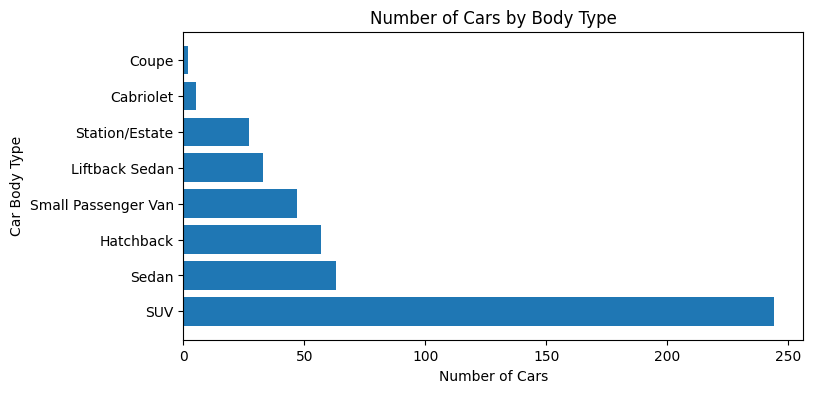

In [22]:
plt.figure(figsize=(8, 4))

plt.barh(dimension_each_type_df['car_body_type'],
        dimension_each_type_df['amount'])

plt.title("Number of Cars by Body Type")
plt.xlabel("Number of Cars")
plt.ylabel("Car Body Type")

plt.savefig("results/Number of Cars by Body Type.png", dpi=300, bbox_inches='tight')
plt.show()